In [1]:
import os
import datetime
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import compression as comp
import matplotlib.image as mpimg
from utilities import Utilities
Utilities.now()

python exe: C:\Users\jmull\Anaconda3\envs\nn\python.exe


datetime.datetime(2021, 4, 2, 18, 37, 16, 940872)

(3024, 4032)
(378, 504)


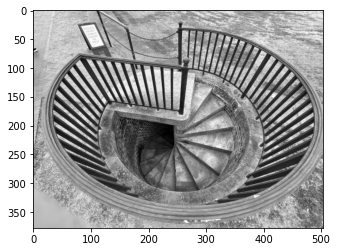

0

In [4]:
colimg = mpimg.imread("fopu-staircase.JPG")
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def spatial_shrink(block, spatial_factor):
    result = np.zeros((block.shape[0] // spatial_factor, 
                       block.shape[1] // spatial_factor))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.mean(block[i*spatial_factor:(i+1)*spatial_factor,
                                        j*spatial_factor:(j+1)*spatial_factor])
    return result
    
big_img = rgb2gray(colimg)
print(big_img.shape)
oimg = spatial_shrink(big_img, spatial_factor=8)
print(oimg.shape)
plt.imshow(oimg, cmap=plt.get_cmap('gray')) #, vmin=0, vmax=1)
plt.show()
(3024 - 3024 % 32) % 32

In [24]:

  
def get_transformed_domain(img, dx, dy, spatial_factor, intensity_factor):
  orig = img[dx: dx+domain_size, dy:dy+domain_size]  
  spatial = shrink(orig, spatial_factor)

def find_best_params(img, dimg, rx, ry, block_size, spatial_factor, intensity_shrinkage,
                    max_x_offset, max_y_offset,
                    err_func=None, 
                    verbosity=0):
  if verbosity > 1:
    argdict = locals().copy()
    for k in argdict.keys():
      val = argdict[k]
      if not Utilities.is_iterable(val):
        print("  {0}: {1}".format(k, argdict[k]))  
      else:
        print("  {0} is iterable".format(k))
  if verbosity > 1:
    print("rx= {0}, ry= {1}".format(rx, ry))
  if rx > 0:
    pass
    #import pdb
    #pdb.set_trace()
  left = max(int(rx/2) - max_x_offset, 0)
  right = min(int(rx/2) + max_x_offset , dimg.shape[1] - block_size - 1)
  
  up = max(int(ry/2) - max_y_offset, 0)
  down = min(int(ry/2) + max_y_offset , dimg.shape[0] - block_size - 1)
  if (left >= right) or (up >= down):
    import pdb
    pdb.set_trace()
  if verbosity > 0:
    pass
    #print("left= {0}, right= {1}, up= {2}, down= {3}".format(left, right, up, down))
  
  rblock = img[rx:rx+block_size, ry:ry+block_size]  
  
  #plt.imshow(rblock, cmap=plt.get_cmap('gray')) #, vmin=0, vmax=1)
  #plt.show() 
  
  best_err = np.finfo('float').max
  tries = 0
  best_x = rx
  best_y = ry
  for dx in range(left, right, block_size):
    #print("dx= {0}".format(dx))
    for dy in range(up, down, block_size):
      #print("dx= {0}, dy= {1}".format(dx, dy))
      dblock = dimg[dx: dx+block_size, dy:dy+block_size]
      if (dblock.shape[0] != rblock.shape[0]) or (dblock.shape[1] != rblock.shape[1]):
        import pdb
        pdb.set_trace      
      dblock *= intensity_shrinkage
      if (dblock.shape[0] != rblock.shape[0]) or (dblock.shape[1] != rblock.shape[1]):
        import pdb
        pdb.set_trace    
      try:
        err = err_func(rblock, dblock)
      except Exception as e:
        import pdb
        pdb.set_trace
      tries += 1
      if err < best_err:
        best_dblock = dblock.copy()
        best_x = dx
        best_y = dy
        best_err = err
  if tries == 0:
    import pdb
    pdb.set_trace()
  #print("tries= {0}".format(tries))
  return (best_x, best_y)
      
def trim_image(img, spatial_factor, block_size, verbosity=0):
    if verbosity > 0:
      print(Utilities.whoami())
      argdict = locals().copy()
      for k in argdict.keys():
        val = argdict[k]
        if not Utilities.is_iterable(val):
          print("  {0}: {1}".format(k, argdict[k]))  
        else:
          print("  {0} is iterable".format(k))  
    if verbosity > 0:
      print("orig dims: {0}, {1}".format(img.shape[0], img.shape[1]))   
    if verbosity > 2:
      import pdb
      pdb.set_trace()
    ht_mod = img.shape[0] % (spatial_factor * block_size)
    wd_mod = img.shape[1] % (spatial_factor * block_size)
    adj_wd = img.shape[0] - ht_mod
    adj_ht = img.shape[1] - wd_mod
    if verbosity > 0:
      print("wd_mod= {0}, ht_mod= {1}\nadj_wd= {2}, adj_ht= {3}".format(wd_mod, ht_mod,
                                                                       adj_wd, adj_ht))
    res = img[0:adj_wd, 0:adj_ht].copy()
    if verbosity > 0:
      print("trimmed dims: {0}, {1}".format(res.shape[0], res.shape[1]))      
    return res
    
def make_codes(oimg, block_size=4, spatial_factor=2, 
               intensity_shrinkage=0.75,
              max_x_offset=None,
              max_y_offset=None,
              err_func=None,
              verbosity=0):
    if verbosity > 0:
      print(Utilities.whoami())      
      argdict = locals().copy()
      for k in argdict.keys():
        val = argdict[k]
        if not Utilities.is_iterable(val):
          print("  {0}: {1}".format(k, argdict[k]))  
        else:
          print("  {0} is iterable".format(k))
    if verbosity > 0:
      print("orig dims: {0}, {1}".format(oimg.shape[0], oimg.shape[1]))
    cimg = trim_image(oimg, spatial_factor=spatial_factor, block_size=block_size, verbosity=verbosity)
    if verbosity > 0:
      print("trimmed dims: {0}, {1}".format(cimg.shape[0], cimg.shape[1]))    
    if max_x_offset is None:
      max_x_offset = cimg.shape[1] - block_wd
    if max_y_offset is None:
      max_y_offset = cimg.shape[0].block_wd
    dimg = spatial_shrink(cimg, spatial_factor=spatial_factor)
    print("dimg_wd = {0}, dimg_ht = {1}".format(dimg.shape[0], dimg.shape[1]))    
    codes = []
    for rx in range(0, cimg.shape[1] - 1, block_size):  
        for ry in range(0, cimg.shape[0] - 1, block_size):
          #print("x={0}, y={1},  ".format(rx, ry), end='')
          dx, dy = find_best_params(cimg, dimg, rx, ry, block_size, spatial_factor, intensity_shrinkage,
                                   max_x_offset=max_x_offset, max_y_offset=max_y_offset,
                                   err_func=err_func, verbosity=verbosity)
          this_code = (rx, ry, dx, dy)
          codes.append(this_code)
    return codes
  
def mse(img1, img2):
  res = np.finfo('float').max
  try:
    diff = img1 - img2
    res = np.mean(diff * diff)
  except Exception as e:
    import pdb
    pdb.set_trace
  return res

spatial_factor=2
block_size=4
cimg = trim_image(oimg, spatial_factor=spatial_factor, block_size=block_size, verbosity=1)
codes = make_codes(cimg, block_size=4, spatial_factor=2, intensity_shrinkage=0.75, err_func=mse,
                  max_x_offset=40, max_y_offset=40, verbosity=1)

trim_image
  img is iterable
  spatial_factor: 2
  block_size: 4
  verbosity: 1
orig dims: 378, 504
wd_mod= 0, ht_mod= 2
adj_wd= 376, adj_ht= 504
trimmed dims: 376, 504
make_codes
  oimg is iterable
  block_size: 4
  spatial_factor: 2
  intensity_shrinkage: 0.75
  max_x_offset: 40
  max_y_offset: 40
  err_func: <function mse at 0x0000018A68EB88B0>
  verbosity: 1
orig dims: 376, 504
trim_image
  img is iterable
  spatial_factor: 2
  block_size: 4
  verbosity: 1
orig dims: 376, 504
wd_mod= 0, ht_mod= 0
adj_wd= 376, adj_ht= 504
trimmed dims: 376, 504
trimmed dims: 376, 504
dimg_wd = 188, dimg_ht = 252


x=0, y=0,  x=0, y=4,  x=0, y=8,  x=0, y=12,  x=0, y=16,  x=0, y=20,  x=0, y=24,  x=0, y=28,  x=0, y=32,  x=0, y=36,  x=0, y=40,  x=0, y=44,  x=0, y=48,  x=0, y=52,  x=0, y=56,  x=0, y=60,  x=0, y=64,  x=0, y=68,  x=0, y=72,  x=0, y=76,  x=0, y=80,  x=0, y=84,  x=0, y=88,  x=0, y=92,  x=0, y=96,  x=0, y=100,  x=0, y=104,  x=0, y=108,  x=0, y=112,  x=0, y=116,  x=0, y=120,  x=0, y=124,  x=0, y=128,  x=0, y=132,  x=0, y=136,  x=0, y=140,  x=0, y=144,  x=0, y=148,  x=0, y=152,  x=0, y=156,  x=0, y=160,  x=0, y=164,  x=0, y=168,  x=0, y=172,  x=0, y=176,  x=0, y=180,  x=0, y=184,  x=0, y=188,  x=0, y=192,  x=0, y=196,  x=0, y=200,  x=0, y=204,  x=0, y=208,  x=0, y=212,  x=0, y=216,  x=0, y=220,  x=0, y=224,  x=0, y=228,  x=0, y=232,  x=0, y=236,  x=0, y=240,  x=0, y=244,  x=0, y=248,  x=0, y=252,  x=0, y=256,  x=0, y=260,  x=0, y=264,  x=0, y=268,  x=0, y=272,  x=0, y=276,  x=0, y=280,  x=0, y=284,  x=0, y=288,  x=0, y=292,  x=0, y=296,  x=0, y=300,  x=0, y=304,  x=0, y=308,  x=0, y=312,  x

x=24, y=364,  x=24, y=368,  x=24, y=372,  x=28, y=0,  x=28, y=4,  x=28, y=8,  x=28, y=12,  x=28, y=16,  x=28, y=20,  x=28, y=24,  x=28, y=28,  x=28, y=32,  x=28, y=36,  x=28, y=40,  x=28, y=44,  x=28, y=48,  x=28, y=52,  x=28, y=56,  x=28, y=60,  x=28, y=64,  x=28, y=68,  x=28, y=72,  x=28, y=76,  x=28, y=80,  x=28, y=84,  x=28, y=88,  x=28, y=92,  x=28, y=96,  x=28, y=100,  x=28, y=104,  x=28, y=108,  x=28, y=112,  x=28, y=116,  x=28, y=120,  x=28, y=124,  x=28, y=128,  x=28, y=132,  x=28, y=136,  x=28, y=140,  x=28, y=144,  x=28, y=148,  x=28, y=152,  x=28, y=156,  x=28, y=160,  x=28, y=164,  x=28, y=168,  x=28, y=172,  x=28, y=176,  x=28, y=180,  x=28, y=184,  x=28, y=188,  x=28, y=192,  x=28, y=196,  x=28, y=200,  x=28, y=204,  x=28, y=208,  x=28, y=212,  x=28, y=216,  x=28, y=220,  x=28, y=224,  x=28, y=228,  x=28, y=232,  x=28, y=236,  x=28, y=240,  x=28, y=244,  x=28, y=248,  x=28, y=252,  x=28, y=256,  x=28, y=260,  x=28, y=264,  x=28, y=268,  x=28, y=272,  x=28, y=276,  x=28, 

x=52, y=144,  x=52, y=148,  x=52, y=152,  x=52, y=156,  x=52, y=160,  x=52, y=164,  x=52, y=168,  x=52, y=172,  x=52, y=176,  x=52, y=180,  x=52, y=184,  x=52, y=188,  x=52, y=192,  x=52, y=196,  x=52, y=200,  x=52, y=204,  x=52, y=208,  x=52, y=212,  x=52, y=216,  x=52, y=220,  x=52, y=224,  x=52, y=228,  x=52, y=232,  x=52, y=236,  x=52, y=240,  x=52, y=244,  x=52, y=248,  x=52, y=252,  x=52, y=256,  x=52, y=260,  x=52, y=264,  x=52, y=268,  x=52, y=272,  x=52, y=276,  x=52, y=280,  x=52, y=284,  x=52, y=288,  x=52, y=292,  x=52, y=296,  x=52, y=300,  x=52, y=304,  x=52, y=308,  x=52, y=312,  x=52, y=316,  x=52, y=320,  x=52, y=324,  x=52, y=328,  x=52, y=332,  x=52, y=336,  x=52, y=340,  x=52, y=344,  x=52, y=348,  x=52, y=352,  x=52, y=356,  x=52, y=360,  x=52, y=364,  x=52, y=368,  x=52, y=372,  x=56, y=0,  x=56, y=4,  x=56, y=8,  x=56, y=12,  x=56, y=16,  x=56, y=20,  x=56, y=24,  x=56, y=28,  x=56, y=32,  x=56, y=36,  x=56, y=40,  x=56, y=44,  x=56, y=48,  x=56, y=52,  x=56, y=5

x=76, y=312,  x=76, y=316,  x=76, y=320,  x=76, y=324,  x=76, y=328,  x=76, y=332,  x=76, y=336,  x=76, y=340,  x=76, y=344,  x=76, y=348,  x=76, y=352,  x=76, y=356,  x=76, y=360,  x=76, y=364,  x=76, y=368,  x=76, y=372,  x=80, y=0,  x=80, y=4,  x=80, y=8,  x=80, y=12,  x=80, y=16,  x=80, y=20,  x=80, y=24,  x=80, y=28,  x=80, y=32,  x=80, y=36,  x=80, y=40,  x=80, y=44,  x=80, y=48,  x=80, y=52,  x=80, y=56,  x=80, y=60,  x=80, y=64,  x=80, y=68,  x=80, y=72,  x=80, y=76,  x=80, y=80,  x=80, y=84,  x=80, y=88,  x=80, y=92,  x=80, y=96,  x=80, y=100,  x=80, y=104,  x=80, y=108,  x=80, y=112,  x=80, y=116,  x=80, y=120,  x=80, y=124,  x=80, y=128,  x=80, y=132,  x=80, y=136,  x=80, y=140,  x=80, y=144,  x=80, y=148,  x=80, y=152,  x=80, y=156,  x=80, y=160,  x=80, y=164,  x=80, y=168,  x=80, y=172,  x=80, y=176,  x=80, y=180,  x=80, y=184,  x=80, y=188,  x=80, y=192,  x=80, y=196,  x=80, y=200,  x=80, y=204,  x=80, y=208,  x=80, y=212,  x=80, y=216,  x=80, y=220,  x=80, y=224,  x=80, 

x=104, y=192,  x=104, y=196,  x=104, y=200,  x=104, y=204,  x=104, y=208,  x=104, y=212,  x=104, y=216,  x=104, y=220,  x=104, y=224,  x=104, y=228,  x=104, y=232,  x=104, y=236,  x=104, y=240,  x=104, y=244,  x=104, y=248,  x=104, y=252,  x=104, y=256,  x=104, y=260,  x=104, y=264,  x=104, y=268,  x=104, y=272,  x=104, y=276,  x=104, y=280,  x=104, y=284,  x=104, y=288,  x=104, y=292,  x=104, y=296,  x=104, y=300,  x=104, y=304,  x=104, y=308,  x=104, y=312,  x=104, y=316,  x=104, y=320,  x=104, y=324,  x=104, y=328,  x=104, y=332,  x=104, y=336,  x=104, y=340,  x=104, y=344,  x=104, y=348,  x=104, y=352,  x=104, y=356,  x=104, y=360,  x=104, y=364,  x=104, y=368,  x=104, y=372,  x=108, y=0,  x=108, y=4,  x=108, y=8,  x=108, y=12,  x=108, y=16,  x=108, y=20,  x=108, y=24,  x=108, y=28,  x=108, y=32,  x=108, y=36,  x=108, y=40,  x=108, y=44,  x=108, y=48,  x=108, y=52,  x=108, y=56,  x=108, y=60,  x=108, y=64,  x=108, y=68,  x=108, y=72,  x=108, y=76,  x=108, y=80,  x=108, y=84,  x=108

x=128, y=228,  x=128, y=232,  x=128, y=236,  x=128, y=240,  x=128, y=244,  x=128, y=248,  x=128, y=252,  x=128, y=256,  x=128, y=260,  x=128, y=264,  x=128, y=268,  x=128, y=272,  x=128, y=276,  x=128, y=280,  x=128, y=284,  x=128, y=288,  x=128, y=292,  x=128, y=296,  x=128, y=300,  x=128, y=304,  x=128, y=308,  x=128, y=312,  x=128, y=316,  x=128, y=320,  x=128, y=324,  x=128, y=328,  x=128, y=332,  x=128, y=336,  x=128, y=340,  x=128, y=344,  x=128, y=348,  x=128, y=352,  x=128, y=356,  x=128, y=360,  x=128, y=364,  x=128, y=368,  x=128, y=372,  x=132, y=0,  x=132, y=4,  x=132, y=8,  x=132, y=12,  x=132, y=16,  x=132, y=20,  x=132, y=24,  x=132, y=28,  x=132, y=32,  x=132, y=36,  x=132, y=40,  x=132, y=44,  x=132, y=48,  x=132, y=52,  x=132, y=56,  x=132, y=60,  x=132, y=64,  x=132, y=68,  x=132, y=72,  x=132, y=76,  x=132, y=80,  x=132, y=84,  x=132, y=88,  x=132, y=92,  x=132, y=96,  x=132, y=100,  x=132, y=104,  x=132, y=108,  x=132, y=112,  x=132, y=116,  x=132, y=120,  x=132, y

x=152, y=216,  x=152, y=220,  x=152, y=224,  x=152, y=228,  x=152, y=232,  x=152, y=236,  x=152, y=240,  x=152, y=244,  x=152, y=248,  x=152, y=252,  x=152, y=256,  x=152, y=260,  x=152, y=264,  x=152, y=268,  x=152, y=272,  x=152, y=276,  x=152, y=280,  x=152, y=284,  x=152, y=288,  x=152, y=292,  x=152, y=296,  x=152, y=300,  x=152, y=304,  x=152, y=308,  x=152, y=312,  x=152, y=316,  x=152, y=320,  x=152, y=324,  x=152, y=328,  x=152, y=332,  x=152, y=336,  x=152, y=340,  x=152, y=344,  x=152, y=348,  x=152, y=352,  x=152, y=356,  x=152, y=360,  x=152, y=364,  x=152, y=368,  x=152, y=372,  x=156, y=0,  x=156, y=4,  x=156, y=8,  x=156, y=12,  x=156, y=16,  x=156, y=20,  x=156, y=24,  x=156, y=28,  x=156, y=32,  x=156, y=36,  x=156, y=40,  x=156, y=44,  x=156, y=48,  x=156, y=52,  x=156, y=56,  x=156, y=60,  x=156, y=64,  x=156, y=68,  x=156, y=72,  x=156, y=76,  x=156, y=80,  x=156, y=84,  x=156, y=88,  x=156, y=92,  x=156, y=96,  x=156, y=100,  x=156, y=104,  x=156, y=108,  x=156, y

x=176, y=204,  x=176, y=208,  x=176, y=212,  x=176, y=216,  x=176, y=220,  x=176, y=224,  x=176, y=228,  x=176, y=232,  x=176, y=236,  x=176, y=240,  x=176, y=244,  x=176, y=248,  x=176, y=252,  x=176, y=256,  x=176, y=260,  x=176, y=264,  x=176, y=268,  x=176, y=272,  x=176, y=276,  x=176, y=280,  x=176, y=284,  x=176, y=288,  x=176, y=292,  x=176, y=296,  x=176, y=300,  x=176, y=304,  x=176, y=308,  x=176, y=312,  x=176, y=316,  x=176, y=320,  x=176, y=324,  x=176, y=328,  x=176, y=332,  x=176, y=336,  x=176, y=340,  x=176, y=344,  x=176, y=348,  x=176, y=352,  x=176, y=356,  x=176, y=360,  x=176, y=364,  x=176, y=368,  x=176, y=372,  x=180, y=0,  x=180, y=4,  x=180, y=8,  x=180, y=12,  x=180, y=16,  x=180, y=20,  x=180, y=24,  x=180, y=28,  x=180, y=32,  x=180, y=36,  x=180, y=40,  x=180, y=44,  x=180, y=48,  x=180, y=52,  x=180, y=56,  x=180, y=60,  x=180, y=64,  x=180, y=68,  x=180, y=72,  x=180, y=76,  x=180, y=80,  x=180, y=84,  x=180, y=88,  x=180, y=92,  x=180, y=96,  x=180, y

x=200, y=292,  x=200, y=296,  x=200, y=300,  x=200, y=304,  x=200, y=308,  x=200, y=312,  x=200, y=316,  x=200, y=320,  x=200, y=324,  x=200, y=328,  x=200, y=332,  x=200, y=336,  x=200, y=340,  x=200, y=344,  x=200, y=348,  x=200, y=352,  x=200, y=356,  x=200, y=360,  x=200, y=364,  x=200, y=368,  x=200, y=372,  x=204, y=0,  x=204, y=4,  x=204, y=8,  x=204, y=12,  x=204, y=16,  x=204, y=20,  x=204, y=24,  x=204, y=28,  x=204, y=32,  x=204, y=36,  x=204, y=40,  x=204, y=44,  x=204, y=48,  x=204, y=52,  x=204, y=56,  x=204, y=60,  x=204, y=64,  x=204, y=68,  x=204, y=72,  x=204, y=76,  x=204, y=80,  x=204, y=84,  x=204, y=88,  x=204, y=92,  x=204, y=96,  x=204, y=100,  x=204, y=104,  x=204, y=108,  x=204, y=112,  x=204, y=116,  x=204, y=120,  x=204, y=124,  x=204, y=128,  x=204, y=132,  x=204, y=136,  x=204, y=140,  x=204, y=144,  x=204, y=148,  x=204, y=152,  x=204, y=156,  x=204, y=160,  x=204, y=164,  x=204, y=168,  x=204, y=172,  x=204, y=176,  x=204, y=180,  x=204, y=184,  x=204, y

x=224, y=368,  x=224, y=372,  x=228, y=0,  x=228, y=4,  x=228, y=8,  x=228, y=12,  x=228, y=16,  x=228, y=20,  x=228, y=24,  x=228, y=28,  x=228, y=32,  x=228, y=36,  x=228, y=40,  x=228, y=44,  x=228, y=48,  x=228, y=52,  x=228, y=56,  x=228, y=60,  x=228, y=64,  x=228, y=68,  x=228, y=72,  x=228, y=76,  x=228, y=80,  x=228, y=84,  x=228, y=88,  x=228, y=92,  x=228, y=96,  x=228, y=100,  x=228, y=104,  x=228, y=108,  x=228, y=112,  x=228, y=116,  x=228, y=120,  x=228, y=124,  x=228, y=128,  x=228, y=132,  x=228, y=136,  x=228, y=140,  x=228, y=144,  x=228, y=148,  x=228, y=152,  x=228, y=156,  x=228, y=160,  x=228, y=164,  x=228, y=168,  x=228, y=172,  x=228, y=176,  x=228, y=180,  x=228, y=184,  x=228, y=188,  x=228, y=192,  x=228, y=196,  x=228, y=200,  x=228, y=204,  x=228, y=208,  x=228, y=212,  x=228, y=216,  x=228, y=220,  x=228, y=224,  x=228, y=228,  x=228, y=232,  x=228, y=236,  x=228, y=240,  x=228, y=244,  x=228, y=248,  x=228, y=252,  x=228, y=256,  x=228, y=260,  x=228, y

x=252, y=160,  x=252, y=164,  x=252, y=168,  x=252, y=172,  x=252, y=176,  x=252, y=180,  x=252, y=184,  x=252, y=188,  x=252, y=192,  x=252, y=196,  x=252, y=200,  x=252, y=204,  x=252, y=208,  x=252, y=212,  x=252, y=216,  x=252, y=220,  x=252, y=224,  x=252, y=228,  x=252, y=232,  x=252, y=236,  x=252, y=240,  x=252, y=244,  x=252, y=248,  x=252, y=252,  x=252, y=256,  x=252, y=260,  x=252, y=264,  x=252, y=268,  x=252, y=272,  x=252, y=276,  x=252, y=280,  x=252, y=284,  x=252, y=288,  x=252, y=292,  x=252, y=296,  x=252, y=300,  x=252, y=304,  x=252, y=308,  x=252, y=312,  x=252, y=316,  x=252, y=320,  x=252, y=324,  x=252, y=328,  x=252, y=332,  x=252, y=336,  x=252, y=340,  x=252, y=344,  x=252, y=348,  x=252, y=352,  x=252, y=356,  x=252, y=360,  x=252, y=364,  x=252, y=368,  x=252, y=372,  x=256, y=0,  x=256, y=4,  x=256, y=8,  x=256, y=12,  x=256, y=16,  x=256, y=20,  x=256, y=24,  x=256, y=28,  x=256, y=32,  x=256, y=36,  x=256, y=40,  x=256, y=44,  x=256, y=48,  x=256, y=52

x=276, y=260,  x=276, y=264,  x=276, y=268,  x=276, y=272,  x=276, y=276,  x=276, y=280,  x=276, y=284,  x=276, y=288,  x=276, y=292,  x=276, y=296,  x=276, y=300,  x=276, y=304,  x=276, y=308,  x=276, y=312,  x=276, y=316,  x=276, y=320,  x=276, y=324,  x=276, y=328,  x=276, y=332,  x=276, y=336,  x=276, y=340,  x=276, y=344,  x=276, y=348,  x=276, y=352,  x=276, y=356,  x=276, y=360,  x=276, y=364,  x=276, y=368,  x=276, y=372,  x=280, y=0,  x=280, y=4,  x=280, y=8,  x=280, y=12,  x=280, y=16,  x=280, y=20,  x=280, y=24,  x=280, y=28,  x=280, y=32,  x=280, y=36,  x=280, y=40,  x=280, y=44,  x=280, y=48,  x=280, y=52,  x=280, y=56,  x=280, y=60,  x=280, y=64,  x=280, y=68,  x=280, y=72,  x=280, y=76,  x=280, y=80,  x=280, y=84,  x=280, y=88,  x=280, y=92,  x=280, y=96,  x=280, y=100,  x=280, y=104,  x=280, y=108,  x=280, y=112,  x=280, y=116,  x=280, y=120,  x=280, y=124,  x=280, y=128,  x=280, y=132,  x=280, y=136,  x=280, y=140,  x=280, y=144,  x=280, y=148,  x=280, y=152,  x=280, y

x=300, y=280,  x=300, y=284,  x=300, y=288,  x=300, y=292,  x=300, y=296,  x=300, y=300,  x=300, y=304,  x=300, y=308,  x=300, y=312,  x=300, y=316,  x=300, y=320,  x=300, y=324,  x=300, y=328,  x=300, y=332,  x=300, y=336,  x=300, y=340,  x=300, y=344,  x=300, y=348,  x=300, y=352,  x=300, y=356,  x=300, y=360,  x=300, y=364,  x=300, y=368,  x=300, y=372,  x=304, y=0,  x=304, y=4,  x=304, y=8,  x=304, y=12,  x=304, y=16,  x=304, y=20,  x=304, y=24,  x=304, y=28,  x=304, y=32,  x=304, y=36,  x=304, y=40,  x=304, y=44,  x=304, y=48,  x=304, y=52,  x=304, y=56,  x=304, y=60,  x=304, y=64,  x=304, y=68,  x=304, y=72,  x=304, y=76,  x=304, y=80,  x=304, y=84,  x=304, y=88,  x=304, y=92,  x=304, y=96,  x=304, y=100,  x=304, y=104,  x=304, y=108,  x=304, y=112,  x=304, y=116,  x=304, y=120,  x=304, y=124,  x=304, y=128,  x=304, y=132,  x=304, y=136,  x=304, y=140,  x=304, y=144,  x=304, y=148,  x=304, y=152,  x=304, y=156,  x=304, y=160,  x=304, y=164,  x=304, y=168,  x=304, y=172,  x=304, y

x=328, y=228,  x=328, y=232,  x=328, y=236,  x=328, y=240,  x=328, y=244,  x=328, y=248,  x=328, y=252,  x=328, y=256,  x=328, y=260,  x=328, y=264,  x=328, y=268,  x=328, y=272,  x=328, y=276,  x=328, y=280,  x=328, y=284,  x=328, y=288,  x=328, y=292,  x=328, y=296,  x=328, y=300,  x=328, y=304,  x=328, y=308,  x=328, y=312,  x=328, y=316,  x=328, y=320,  x=328, y=324,  x=328, y=328,  x=328, y=332,  x=328, y=336,  x=328, y=340,  x=328, y=344,  x=328, y=348,  x=328, y=352,  x=328, y=356,  x=328, y=360,  x=328, y=364,  x=328, y=368,  x=328, y=372,  x=332, y=0,  x=332, y=4,  x=332, y=8,  x=332, y=12,  x=332, y=16,  x=332, y=20,  x=332, y=24,  x=332, y=28,  x=332, y=32,  x=332, y=36,  x=332, y=40,  x=332, y=44,  x=332, y=48,  x=332, y=52,  x=332, y=56,  x=332, y=60,  x=332, y=64,  x=332, y=68,  x=332, y=72,  x=332, y=76,  x=332, y=80,  x=332, y=84,  x=332, y=88,  x=332, y=92,  x=332, y=96,  x=332, y=100,  x=332, y=104,  x=332, y=108,  x=332, y=112,  x=332, y=116,  x=332, y=120,  x=332, y

x=356, y=184,  x=356, y=188,  x=356, y=192,  x=356, y=196,  x=356, y=200,  x=356, y=204,  x=356, y=208,  x=356, y=212,  x=356, y=216,  x=356, y=220,  x=356, y=224,  x=356, y=228,  x=356, y=232,  x=356, y=236,  x=356, y=240,  x=356, y=244,  x=356, y=248,  x=356, y=252,  x=356, y=256,  x=356, y=260,  x=356, y=264,  x=356, y=268,  x=356, y=272,  x=356, y=276,  x=356, y=280,  x=356, y=284,  x=356, y=288,  x=356, y=292,  x=356, y=296,  x=356, y=300,  x=356, y=304,  x=356, y=308,  x=356, y=312,  x=356, y=316,  x=356, y=320,  x=356, y=324,  x=356, y=328,  x=356, y=332,  x=356, y=336,  x=356, y=340,  x=356, y=344,  x=356, y=348,  x=356, y=352,  x=356, y=356,  x=356, y=360,  x=356, y=364,  x=356, y=368,  x=356, y=372,  x=360, y=0,  x=360, y=4,  x=360, y=8,  x=360, y=12,  x=360, y=16,  x=360, y=20,  x=360, y=24,  x=360, y=28,  x=360, y=32,  x=360, y=36,  x=360, y=40,  x=360, y=44,  x=360, y=48,  x=360, y=52,  x=360, y=56,  x=360, y=60,  x=360, y=64,  x=360, y=68,  x=360, y=72,  x=360, y=76,  x=3

C:\Users\jmull\Anaconda3\envs\nn\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jmull\Anaconda3\envs\nn\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


x=376, y=4,  x=376, y=8,  x=376, y=12,  x=376, y=16,  x=376, y=20,  x=376, y=24,  x=376, y=28,  x=376, y=32,  x=376, y=36,  x=376, y=40,  x=376, y=44,  x=376, y=48,  x=376, y=52,  x=376, y=56,  x=376, y=60,  x=376, y=64,  x=376, y=68,  x=376, y=72,  x=376, y=76,  x=376, y=80,  x=376, y=84,  x=376, y=88,  x=376, y=92,  x=376, y=96,  x=376, y=100,  x=376, y=104,  x=376, y=108,  x=376, y=112,  x=376, y=116,  x=376, y=120,  x=376, y=124,  x=376, y=128,  x=376, y=132,  x=376, y=136,  x=376, y=140,  x=376, y=144,  x=376, y=148,  x=376, y=152,  x=376, y=156,  x=376, y=160,  x=376, y=164,  x=376, y=168,  x=376, y=172,  x=376, y=176,  x=376, y=180,  x=376, y=184,  x=376, y=188,  x=376, y=192,  x=376, y=196,  x=376, y=200,  x=376, y=204,  x=376, y=208,  x=376, y=212,  x=376, y=216,  x=376, y=220,  x=376, y=224,  x=376, y=228,  x=376, y=232,  x=376, y=236,  x=376, y=240,  x=376, y=244,  x=376, y=248,  x=376, y=252,  x=376, y=256,  x=376, y=260,  x=376, y=264,  x=376, y=268,  x=376, y=272,  x=376,

x=420, y=340,  x=420, y=344,  x=420, y=348,  x=420, y=352,  x=420, y=356,  x=420, y=360,  x=420, y=364,  x=420, y=368,  x=420, y=372,  x=424, y=0,  x=424, y=4,  x=424, y=8,  x=424, y=12,  x=424, y=16,  x=424, y=20,  x=424, y=24,  x=424, y=28,  x=424, y=32,  x=424, y=36,  x=424, y=40,  x=424, y=44,  x=424, y=48,  x=424, y=52,  x=424, y=56,  x=424, y=60,  x=424, y=64,  x=424, y=68,  x=424, y=72,  x=424, y=76,  x=424, y=80,  x=424, y=84,  x=424, y=88,  x=424, y=92,  x=424, y=96,  x=424, y=100,  x=424, y=104,  x=424, y=108,  x=424, y=112,  x=424, y=116,  x=424, y=120,  x=424, y=124,  x=424, y=128,  x=424, y=132,  x=424, y=136,  x=424, y=140,  x=424, y=144,  x=424, y=148,  x=424, y=152,  x=424, y=156,  x=424, y=160,  x=424, y=164,  x=424, y=168,  x=424, y=172,  x=424, y=176,  x=424, y=180,  x=424, y=184,  x=424, y=188,  x=424, y=192,  x=424, y=196,  x=424, y=200,  x=424, y=204,  x=424, y=208,  x=424, y=212,  x=424, y=216,  x=424, y=220,  x=424, y=224,  x=424, y=228,  x=424, y=232,  x=424, y

x=464, y=228,  x=464, y=232,  x=464, y=236,  x=464, y=240,  x=464, y=244,  x=464, y=248,  x=464, y=252,  x=464, y=256,  x=464, y=260,  x=464, y=264,  x=464, y=268,  x=464, y=272,  x=464, y=276,  x=464, y=280,  x=464, y=284,  x=464, y=288,  x=464, y=292,  x=464, y=296,  x=464, y=300,  x=464, y=304,  x=464, y=308,  x=464, y=312,  x=464, y=316,  x=464, y=320,  x=464, y=324,  x=464, y=328,  x=464, y=332,  x=464, y=336,  x=464, y=340,  x=464, y=344,  x=464, y=348,  x=464, y=352,  x=464, y=356,  x=464, y=360,  x=464, y=364,  x=464, y=368,  x=464, y=372,  x=468, y=0,  x=468, y=4,  x=468, y=8,  x=468, y=12,  x=468, y=16,  x=468, y=20,  x=468, y=24,  x=468, y=28,  x=468, y=32,  x=468, y=36,  x=468, y=40,  x=468, y=44,  x=468, y=48,  x=468, y=52,  x=468, y=56,  x=468, y=60,  x=468, y=64,  x=468, y=68,  x=468, y=72,  x=468, y=76,  x=468, y=80,  x=468, y=84,  x=468, y=88,  x=468, y=92,  x=468, y=96,  x=468, y=100,  x=468, y=104,  x=468, y=108,  x=468, y=112,  x=468, y=116,  x=468, y=120,  x=468, y

In [28]:
block_size = 4
((cimg.shape[0] ) / block_size) * ((cimg.shape[1]) /block_size) - len(codes)

0.0

In [29]:
cimg.shape

(376, 504)

In [30]:
codes[:10]

[(0, 0, 0, 16),
 (0, 4, 28, 40),
 (0, 8, 28, 40),
 (0, 12, 16, 44),
 (0, 16, 16, 44),
 (0, 20, 16, 48),
 (0, 24, 16, 48),
 (0, 28, 28, 52),
 (0, 32, 28, 52),
 (0, 36, 24, 56)]

In [ ]:
img.shape[0] - (img.shape[0] % 8)

In [ ]:
x = np.array([1,2,3,4,5,6])
y = x.reshape(3,2)
print(y)
print(y.shape)
